# UniaxialMaterialAnalysis example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import opswrapper as ops

## Configuration
If your paths need configuring, do that here. Defaults are read from a file called `.path_of.toml` in your home directory if it exists.

In [2]:
# ops.config.path_of.opensees = <your opensees path>
# ops.config.path_of.scratch = <your scratch dir>

## Define material

In [3]:
Fy = 50
E = 29000
b = 0.01

steel = ops.material.Steel02(1, Fy, E, b, R0=20)
str(steel)

'uniaxialMaterial Steel02 1 50 29000 0.01 20 0.925 0.15'

## Define loading

Here we are using the loading sequence for cyclic tests for qualification of buckling-restrained braces from the AISC 2016 Seismic Provisions (Section K3.4c).

In [4]:
yield_strain = Fy/E
design_strain = 0.005
strain_peaks = np.concatenate([
    np.array([0, 1, -1, 1, -1])*yield_strain,
    np.array([0.5, -0.5, 0.5, -0.5,
              1, -1, 1, -1,
              1.5, -1.5, 1.5, -1.5,
              2, -2, 2, -2, 0])*design_strain
])
strain_rate = yield_strain/10

## Run analysis

In [5]:
analysis = ops.analysis.UniaxialMaterialAnalysis(steel)

results_pos_env = analysis.run_analysis([0, 1.2*strain_peaks.max()], 'StrainRate', strain_rate)
results_neg_env = analysis.run_analysis([0, 1.2*strain_peaks.min()], 'StrainRate', strain_rate)
results_cyclic = analysis.run_analysis(strain_peaks, 'StrainRate', strain_rate)

## Plot results

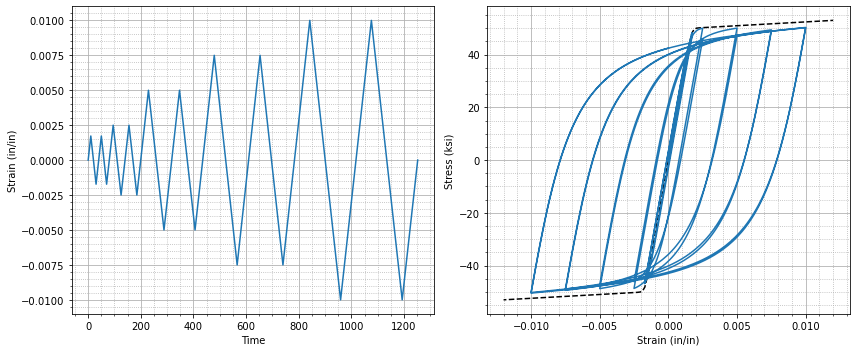

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Strain history
axes[0].plot(results_cyclic.time, results_cyclic.disp)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Strain (in/in)')

# Results
axes[1].plot(results_pos_env.disp, results_pos_env.force, color='k', linestyle='dashed')
axes[1].plot(results_neg_env.disp, results_neg_env.force, color='k', linestyle='dashed')
axes[1].plot(results_cyclic.disp, results_cyclic.force)
axes[1].set_xlabel('Strain (in/in)')
axes[1].set_ylabel('Stress (ksi)')

for ax in axes.flat:
    ax.minorticks_on()
    ax.grid(True, 'major')
    ax.grid(True, 'minor', linestyle='dotted')

fig.tight_layout()
plt.show()